In [8]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
dataset = pd.read_csv("live_sellers.csv")

# strip the empty columns from the set
del dataset['Column1']
del dataset['Column2']
del dataset['Column3']
del dataset['Column4']

# sort data by status_type with 'status' first, then 'photo' then 'video' and finally 'link'
dataset['status_type'] = pd.Categorical(dataset['status_type'], categories=['status', 'photo', 'video', 'link'], ordered=True)
sorted_dataset = dataset.sort_values(by=['status_type'])
# puts a scrollbar next to the table
display(HTML("<div style='max-height: 500px; overflow-y: scroll;'><div style='max-height: 500px; overflow-y: scroll;'>"+sorted_dataset.to_html()+"</div></div>"))

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
2656,2657,status,6/8/2018 5:57,76,1,1,75,1,0,0,0,0
4626,4627,status,3/25/2018 3:59,234,10,0,231,3,0,0,0,0
1106,1107,status,9/10/2015 5:22,2244,11,0,2244,0,0,0,0,0
2852,2853,status,4/24/2018 8:17,65,9,0,65,0,0,0,0,0
2044,2045,status,1/2/2013 9:06,30,23,4,30,0,0,0,0,0
935,936,status,2/2/2016 1:32,42,9,0,42,0,0,0,0,0
4612,4613,status,3/28/2018 5:26,1511,311,4,1468,10,33,0,0,0
3041,3042,status,3/6/2018 10:05,82,14,0,78,3,0,0,1,0
4609,4610,status,3/30/2018 1:46,1394,239,7,1365,8,21,0,0,0
1117,1118,status,8/29/2015 2:39,1042,8,0,1042,0,0,0,0,0


### Correlation Matrix

In [9]:
# strip the columns that are not needed
stripped_dataset = dataset[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

stripped_dataset = stripped_dataset.corr()
stripped_dataset


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


Correlations:
* reactions vs comments (.150843)
* likes vs reactions (.994923)
* shares vs loves (.820000)
* shares vs comments (.640637)
* loves vs wows (.508798)
* loves vs hahas (.507830)
* wows vs hahas (.287756)
* likes vs comments (.101687)


In [10]:
print(
    '\nNUM_LIKES null?: ', stripped_dataset['num_likes'].isnull().values.any(), 
    'NUM_REACTIONS null?: ', stripped_dataset['num_reactions'].isnull().values.any(), 
    'NUM_SHARES null?: ', stripped_dataset['num_shares'].isnull().values.any(),
    'NUM_COMMENTS null?: ', stripped_dataset['num_comments'].isnull().values.any(),
)

stripped_dataset['num_reactions'] = stripped_dataset['num_reactions'].fillna(stripped_dataset['num_reactions'].mean())
print(
    '\nNaN filled',
    '\nNUM_REACTIONS still null?: ', stripped_dataset['num_reactions'].isnull().values.any())

# assign independent and dependent variables
x = stripped_dataset['num_reactions']
y = stripped_dataset['num_likes']

x2 = stripped_dataset['num_shares']
y2 = stripped_dataset['num_comments']

x3 = stripped_dataset['num_likes']
y3 = stripped_dataset['num_comments']


NUM_LIKES null?:  False NUM_REACTIONS null?:  False NUM_SHARES null?:  False NUM_COMMENTS null?:  False

NaN filled 
NUM_REACTIONS still null?:  False


In [11]:
slope1, intercept1, rvalue1, pvalue1, stderr1 = sc.stats.linregress(x, y)
fit1 = [slope1, intercept1]

slope2, intercept2, rvalue2, pvalue2, stderr2 = sc.stats.linregress(x2, y2)
fit2 = [slope2, intercept2]

print('\nFit 1 (NUM_LIKES vs NUM_REACTIONS)',
      '\nslope:\t\t\t', slope1,
      '\ny-intercept:\t', intercept1,
      '\nR value:\t\t', rvalue1,
      '\nR-squared:\t\t', pow(rvalue1, 2),
      '\nP value:\t\t', pvalue1,
      '\nstd err:\t\t', stderr1,
      '\nRegression line:\t', 'y = ', slope1, 'x + ', intercept1,
      '\nfit:\t\t\t', fit1,
)

print('\nFit 2 (NUM_COMMENTS vs NUM_SHARES)',
      '\nslope:\t\t\t', slope2,
      '\ny-intercept:\t', intercept2,
      '\nR value:\t\t', rvalue2,
      '\nR-squared:\t\t', pow(rvalue2, 2),
      '\nP value:\t\t', pvalue2,
      '\nstd err:\t\t', stderr2,
      '\nRegression line:\t', 'y = ', slope2, 'x + ', intercept2,
      '\nfit:\t\t\t', fit2,
)


Fit 1 (NUM_LIKES vs NUM_REACTIONS) 
slope:			 1.0568328667700557 
y-intercept:	 -0.0653592108289453 
R value:		 0.9977556077661739 
R-squared:		 0.995516252828847 
P value:		 1.7596839123952976e-09 
std err:		 0.0268073368500963 
Regression line:	 y =  1.0568328667700557 x +  -0.0653592108289453 
fit:			 [1.0568328667700557, -0.0653592108289453]

Fit 2 (NUM_COMMENTS vs NUM_SHARES) 
slope:			 0.750210875444783 
y-intercept:	 0.023304706584167112 
R value:		 0.7386726385621241 
R-squared:		 0.5456372669603303 
P value:		 0.02300746146985325 
std err:		 0.2587519758315182 
Regression line:	 y =  0.750210875444783 x +  0.023304706584167112 
fit:			 [0.750210875444783, 0.023304706584167112]


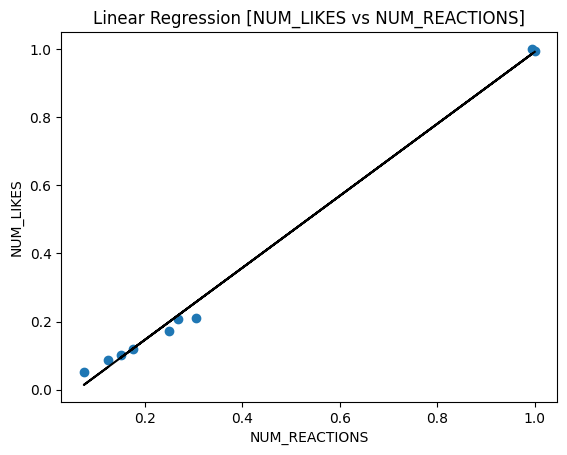

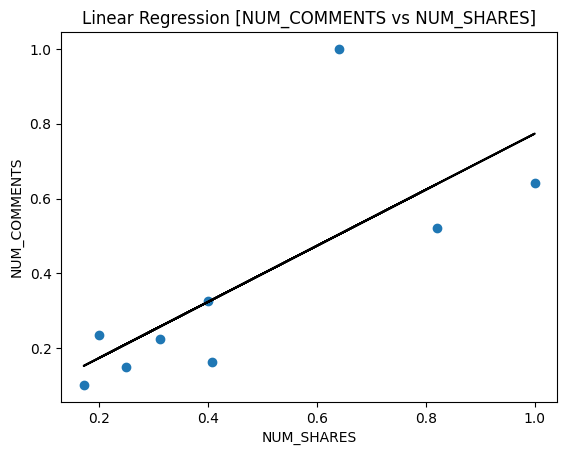

In [12]:
# plot given values and regression prediction line
plt.plot(x, y, 'o', label='original data')
plt.plot(x, fit1[0] * x + fit1[1], 'black', label='fitted line')
plt.xlabel('NUM_REACTIONS')
plt.ylabel('NUM_LIKES')
plt.title('Linear Regression [NUM_LIKES vs NUM_REACTIONS]')
plt.show()

plt.plot(x2, y2, 'o', label='original data')
plt.plot(x2, fit2[0] * x2 + fit2[1], 'black', label='fitted line')
plt.xlabel('NUM_SHARES')
plt.ylabel('NUM_COMMENTS')
plt.title('Linear Regression [NUM_COMMENTS vs NUM_SHARES]')
plt.show()

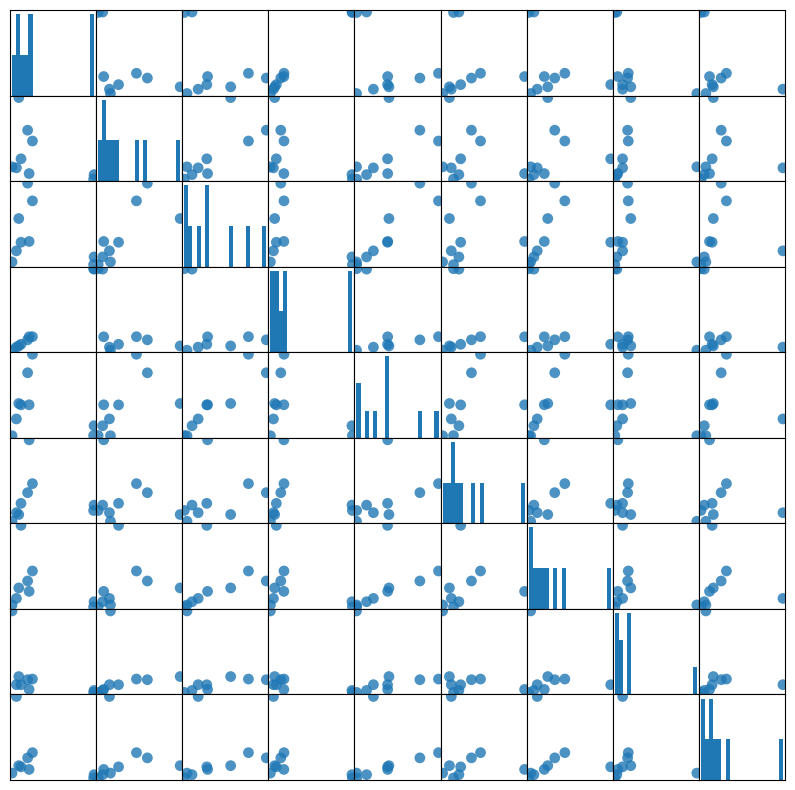

In [13]:
ticks = stripped_dataset.columns

corr_matrix = pd.plotting.scatter_matrix(stripped_dataset, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
for subplot in corr_matrix:
    for ax in subplot:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.set_ylabel("")
        ax.set_xlabel("")
        
plt.show()